In [1]:
!pip install -U spacy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import spacy
from spacy.lang.en.examples import sentences 

In [30]:

!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     -------------------------------------- 0.0/400.7 MB 330.3 kB/s eta 0:20:13
     -------------------------------------- 0.1/400.7 MB 656.4 kB/s eta 0:10:11
     ---------------------------------------- 0.2/400.7 MB 1.5 MB/s eta 0:04:32
     ---------------------------------------- 0.4/400.7 MB 2.0 MB/s eta 0:03:18
     ---------------------------------------- 0.6/400.7 MB 2.6 MB/s eta 0:02:33
     ---------------------------------------- 0.8/400.7 MB 3.0 MB/s eta 0:02:13
     ---------------------------------------- 1.0/400.7 MB 3.2 MB/s eta 0:02:05
     ---------------------------------------- 1.2/400.7 MB 3.4 MB/s eta 0:01:57
     ---------------------------------------- 1.5/400.7 MB 3.7 MB/s eta 0:01:49
     ---------------------------------------- 1.7/400.7 MB 3.9 MB/s eta 0:01:44
     ---------------------------------------- 1.9/400.7 MB 4.0 MB/s eta 0:01:40
     ---------------------------------------- 2


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
nlp

In [6]:
doc = nlp(sentences[0])
doc

Apple is looking at buying U.K. startup for $1 billion

In [7]:
print(doc.text)

Apple is looking at buying U.K. startup for $1 billion


In [8]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup VERB advcl
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [9]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)


Apple Apple PROPN NNP nsubj
is be AUX VBZ aux
looking look VERB VBG ROOT
at at ADP IN prep
buying buy VERB VBG pcomp
U.K. U.K. PROPN NNP dobj
startup startup VERB VB advcl
for for ADP IN prep
$ $ SYM $ quantmod
1 1 NUM CD compound
billion billion NUM CD pobj


In [10]:
tokens = [token.text for token in doc]
tokens

['Apple',
 'is',
 'looking',
 'at',
 'buying',
 'U.K.',
 'startup',
 'for',
 '$',
 '1',
 'billion']

In [20]:
spacy.displacy.render(doc, style="dep", jupyter=True)


In [17]:
for token in doc:
    print(token.text, token.dep_, token.pos_, token.lemma_)

Apple nsubj PROPN Apple
is aux AUX be
looking ROOT VERB look
at prep ADP at
buying pcomp VERB buy
U.K. dobj PROPN U.K.
startup advcl VERB startup
for prep ADP for
$ quantmod SYM $
1 compound NUM 1
billion pobj NUM billion


In [22]:
spacy.displacy.serve(doc, style="ent")

c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


---

In [94]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [79]:
df = pd.read_csv("dataset.csv")

In [83]:
[i for i in df.columns if df[i].dtype == "object"]

['reviewId',
 'content',
 'reviewCreatedVersion',
 'at',
 'replyContent',
 'repliedAt',
 'predicted_category',
 'sentiment',
 'appVersion']

In [84]:
nlp = spacy.load("en_core_web_lg") 


In [85]:
def preprocess_text(text):
    doc = nlp(text.lower())  
    words = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(words)

In [86]:
df['clean_text'] = df['content'].apply(preprocess_text)

In [87]:
df

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion,clean_text
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN,woww
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN,let know details
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN,basic bug fixed scrolling articles start repea...
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN,good
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN,mjkobe
...,...,...,...,...,...,...,...,...,...,...,...,...
61261,e6f30229-7445-4120-b9dc-e83d5714f3df,stop trying to make me pay more. there are no ...,4,0,4.5.1250403,2025-02-04 13:31:00,NaN,NaN,SUBSCRIPTION,NEGATIVE,4.5.1250403,stop trying pay perks friend medium regular me...
61262,b6e4741f-9411-4668-ad3c-d6395cb6af65,good,3,0,4.5.1250091,2025-02-04 09:36:11,NaN,NaN,USER_EXPERIENCE,POSITIVE,4.5.1250091,good
61263,db266bb0-7549-440c-b695-7fd41ac4af35,good project,3,0,4.5.1250091,2025-02-04 07:47:37,NaN,NaN,USER_EXPERIENCE,POSITIVE,4.5.1250091,good project
61264,dbdf033c-05ce-4a64-bcd0-7d8171acae78,"very educative, enlightening platform where yo...",5,0,4.5.1250091,2025-02-04 07:00:47,NaN,NaN,CONTENT,POSITIVE,4.5.1250091,educative enlightening platform detailed infor...


In [88]:
vectorizer = CountVectorizer() 

In [89]:
bow_matrix = vectorizer.fit_transform(df['clean_text'])
bow_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 328066 stored elements and shape (61266, 19795)>

In [95]:
tfi = TfidfTransformer()

In [98]:
X_tfi = tfi.fit_transform(bow_matrix)
X_tfi

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 328066 stored elements and shape (61266, 19795)>

In [99]:
X = X_tfi
y = df["sentiment"]

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=667, stratify=y)

In [108]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100

building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.7s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


0.8687079715348959

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

    NEGATIVE       0.78      0.62      0.69      1667
     NEUTRAL       0.68      0.59      0.63      2125
    POSITIVE       0.91      0.96      0.93     11525

    accuracy                           0.87     15317
   macro avg       0.79      0.72      0.75     15317
weighted avg       0.86      0.87      0.86     15317



<Axes: >

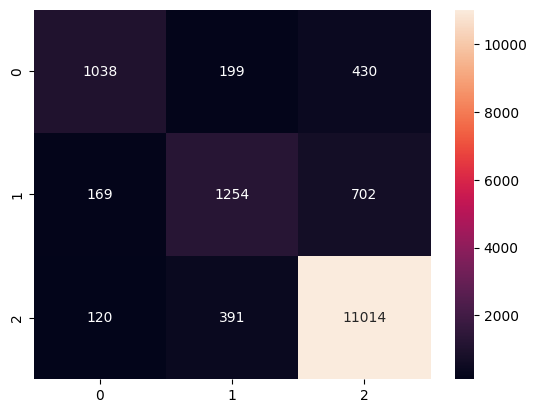

In [ ]:
from numpy import dtype
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".5g")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Generazione di un dataset di esempio (sostituiscilo con il tuo dataset)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definizione del modello
rf = RandomForestClassifier(random_state=42)

# Definizione della griglia di iperparametri
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Numero di alberi
    'max_depth': [None, 10, 20, 30],  # Profondità massima degli alberi
    'min_samples_split': [2, 5, 10],  # Minimo numero di campioni per dividere un nodo
    'min_samples_leaf': [1, 2, 4],  # Minimo numero di campioni in una foglia
    'max_features': ['sqrt', 'log2'],  # Numero massimo di feature considerate per split
    'bootstrap': [True, False]  # Se usare il bootstrap
}

# Grid Search con validazione incrociata
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Esecuzione della ricerca
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Migliori Parametri:", best_params)
print("Miglior Accuratezza Media:", best_score)

# Test sul set di test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuratezza sul Test Set:", test_accuracy)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Creazione di un dataset di esempio con 3 classi sbilanciate
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, weights=[0.5, 0.3, 0.2], random_state=42)

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Definizione del modello
rf = RandomForestClassifier(random_state=42)

# Definizione della griglia di iperparametri con class_weight
param_grid = {
    'n_estimators': [100, 200],  # Numero di alberi
    'max_depth': [None, 10, 20],  # Profondità massima degli alberi
    'min_samples_split': [2, 5],  # Minimo numero di campioni per dividere un nodo
    'min_samples_leaf': [1, 2],  # Minimo numero di campioni in una foglia
    'max_features': ['sqrt', 'log2'],  # Numero massimo di feature considerate per split
    'bootstrap': [True],  # Se usare il bootstrap
    'class_weight': [{0: 2, 1: 2, 2: 1}, {0: 3, 1: 3, 2: 1}, "balanced"]  # Pesi assegnati alle classi
}

# Grid Search con validazione incrociata
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Esecuzione della ricerca
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Migliori Parametri:", best_params)
print("Miglior Accuratezza Media:", best_score)

# Test sul set di test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuratezza sul Test Set:", test_accuracy)
